# Credit Risk Solution

# Data Processing

In [1]:
import numpy as np #linear algebra
import pandas as pd #data processing, CSV file 
import seaborn as sns #graph
import matplotlib.pyplot as plt #graph

filepath = 'C:/Users/Cindy/Code/Input/loan_data_2007_2014.csv'

In [2]:
#membaca dara csv loan_data_2007_2014.csv
data = pd.read_csv(filepath, low_memory=False)

In [3]:
data.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

Kita lihat banyak columns bernilai nulls, maka kita akan membuang columns tersebut. 'Unnamed:0' juga akan dibuang karena data tersebut hanyalah indeks

In [5]:
#membuang beberapa kolom data null
drop_col = ['Unnamed: 0', 'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl',
       'inq_last_12m']

new_data = data.drop(columns=drop_col, axis=1)

In [6]:
#mengecek kembali apakah kolom yang di drop telah hilang
new_data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

In [7]:
# loan status adalah target data yang akan kita gunakan
new_data.loan_status.value_counts()

Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

Selanjutnya kita akan memilah data di column 'loan_status' dan membagianya menjadi pinjaman risk dan good.

Pastinya pinjaman good adalah 'Fully Paid', 'Does not meet the credit policy. Status:Fully Paid'
sedangkan pinjaman risk adalah 'Charged Off', 'Late (31-120 days)', 'Late (16-30 days)', 'Default', 'Does not meet the credit policy. Status:Charged Off'

Kita akan beberapa membuang rows seperti 'Current', 'In Grace Period' karena kita masih belum tau pasti apakah nantinya kedua data ini akan menjadi pinjaman good atau risk sehingga untuk saat ini kedua data tersebut akan dibuang untuk mengantisipasi kebaikan model

In [8]:
#memilah loan status
low_risk = ['Fully Paid', 'Does not meet the credit policy. Status:Fully Paid']

#membuang rows yang ada current dan in grace period
dropcol1 = ['Current', 'In Grace Period']
new_data = new_data[new_data.loan_status.isin(dropcol1) == False]

In [9]:
#melihat rows current dan in grace period telah terbuang
new_data.loan_status.value_counts()

Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [10]:
#membuat kolom baru untuk mengklasifikasi
new_data['loan_ending'] = np.where(new_data['loan_status'].isin(low_risk), 'good', 'risk')

In [11]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           238913 non-null  int64  
 1   member_id                    238913 non-null  int64  
 2   loan_amnt                    238913 non-null  int64  
 3   funded_amnt                  238913 non-null  int64  
 4   funded_amnt_inv              238913 non-null  float64
 5   term                         238913 non-null  object 
 6   int_rate                     238913 non-null  float64
 7   installment                  238913 non-null  float64
 8   grade                        238913 non-null  object 
 9   sub_grade                    238913 non-null  object 
 10  emp_title                    225435 non-null  object 
 11  emp_length                   229688 non-null  object 
 12  home_ownership               238913 non-null  object 
 13 

In [12]:
new_data.loan_ending.value_counts()

good    186727
risk     52186
Name: loan_ending, dtype: int64

<AxesSubplot:title={'center':'good vs risk loans'}>

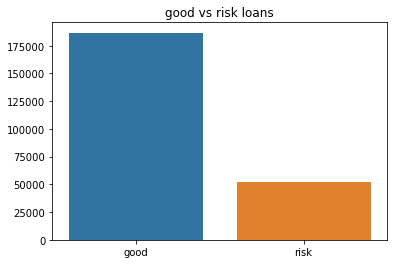

In [14]:
#membuat visualisasi plot antara pinjaman good vs risk
plt.title('good vs risk loans')
sns.barplot(x=new_data.loan_ending.value_counts().index,y=new_data.loan_ending.value_counts().values)

# Melihat Isi dari columns dan data leakage

In [20]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           238913 non-null  int64  
 1   member_id                    238913 non-null  int64  
 2   loan_amnt                    238913 non-null  int64  
 3   funded_amnt                  238913 non-null  int64  
 4   funded_amnt_inv              238913 non-null  float64
 5   term                         238913 non-null  object 
 6   int_rate                     238913 non-null  float64
 7   installment                  238913 non-null  float64
 8   grade                        238913 non-null  object 
 9   sub_grade                    238913 non-null  object 
 10  emp_title                    225435 non-null  object 
 11  emp_length                   229688 non-null  object 
 12  home_ownership               238913 non-null  object 
 13 

1. columns yang berhubungan dengan karakteristik pinjaman
'id', 'loan_amnt', 'funded_amnt', 'installment', dsb

2. columns/informasi yang berhubungan dengan identitas peminjam
'member_id', 'emp_title', 'verification_status', 'addr_state', dsb

3. columns/infomasi yang berhubungan dengan sejarah pinjaman peminjam
'delinq_2yrs', 'ing_last_6mnth', 'pub_rec', 'acc_now_deliq', dsb

4. columns/infomasi yang berhubungan dengan status pinjaman sekarang
'issue_d', 'loan_status', 'last_pymnt_amnt', 'next_pymnt_d', dsb

Dalam credit risk loan ini kita menggunakan infomasi (4) untuk mentukan risk, tetapi columns/infomasi yang disediakan bisa saja membuat model kurang efektif karena ada beberapa columns/infomasi yang dapat diprediksi secara langsung ketika kita melihat valuenya seperti 'recoveries'dimana ketika peminjam tidak dapat mengembalikan pinjaman dan perusahaan pinjaman akan melakukan proses pengembalian pinjaman sehingga menyebabkan pinjaman menjadi bad loan. 

Dari contoh columns tersebut, ketika kita menjalakan training model akan menghasilkan hasil yang bagus karena telah ada infomasi yang kita ingin prediksi tetapi pada percobaan model sesungguhnya akan tidak baik karena adanya 'Data Leakage' tersebut. Sehingga kita akan membuang/drop columns yang berisi data leakage

In [22]:
#ini adalah list dari columns yang berisi data leakage
leak_col = ['issue_d', 'loan_status', 'pymnt_plan', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 
                   'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 
                   'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d']

new_data.drop (columns=leak_col, axis=1, inplace=True)

In [23]:
#selanjutnya melihat columns yang berisi data yang mirip
new_data[['loan_amnt','funded_amnt','funded_amnt_inv','grade','sub_grade','desc','purpose','title']]

,loan_amnt,funded_amnt,funded_amnt_inv,grade,sub_grade,desc,purpose,title
0,5000,5000,4975.0,B,B2,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer
1,2500,2500,2500.0,C,C4,Borrower added on 12/22/11 > I plan to use t...,car,bike
2,2400,2400,2400.0,C,C5,NaN,small_business,real estate business
3,10000,10000,10000.0,C,C1,Borrower added on 12/21/11 > to pay for prop...,other,personel
5,5000,5000,5000.0,A,A4,NaN,wedding,My wedding loan I promise to pay back
...,...,...,...,...,...,...,...,...
466276,8525,8525,8525.0,D,D3,NaN,medical,Medical expenses
466277,18000,18000,17975.0,A,A4,Borrower added on 12/09/13 > consolidate all...,debt_consolidation,my loan
466278,10000,10000,10000.0,D,D3,NaN,vacation,Vacation
466281,22000,22000,22000.0,D,D5,NaN,debt_consolidation,Debt consolidation


Pada columns 'loan_amnt', 'funded_amnt', dan funded_amnt_inv' datanya terlihat mirip, sehingga kita melihat infomasi dari ketiga columns tersebut sebelum memilih salah satu columns. 'grade' dan 'sub_grade' juga terlihat mirip tetapi harus dibandingkan terlebih dahulu. lalu untuk 'desc','purpose','title' berisi infomasi tentang kegunaan pinjaman tetapi untuk columns 'desc' telihat banyak data kosong, dan 'title' untuk judul pinjaman dan 'purpose' untuk kegunaan pinjaman

In [24]:
#melihat infomasi statistik dari ketiga columns yang mirip
new_data[['loan_amnt','funded_amnt','funded_amnt_inv']].describe()

,loan_amnt,funded_amnt,funded_amnt_inv
count,238913.000000,238913.000000,238913.000000
mean,13486.214647,13440.797173,13312.662461
std,8066.725464,8042.190169,8080.099456
min,500.000000,500.000000,0.000000
25%,7200.000000,7200.000000,7125.000000
50%,12000.000000,12000.000000,11914.311470
75%,18000.000000,18000.000000,18000.000000
max,35000.000000,35000.000000,35000.000000


Dari tabel diatas, diperlihatkan ketiga columns 'loan_amnt', 'funded_amnt', dan funded_amnt_inv'mempunyai statsika yang mirip sehingga kita dapat membuang dua columns yang tidak diperlukan untuk data final. Oleh karena itu kita akan mengambil 'loan_amnt' sebagai data yang complete dibandingkan 'funded_amnt_inv' dan lebih tinggi dibandingkan 'funded_amnt'. Lalu kita akan membuang dua columns lainnya yang tidak diperlukan dalam prediksi seperti 'id', 'member_id', 'url', dan 'desc' dimana banyak data kosong dalamnya.

In [25]:
#membuang data
dropcol2 = ['funded_amnt', 'funded_amnt_inv', 'id', 'member_id', 'url', 'desc']
dropped_data = new_data[dropcol2]

new_data.drop(columns=dropcol2, axis=1, inplace=True)

In [26]:
#melihat kembali isi columns
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 37 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    238913 non-null  int64  
 1   term                         238913 non-null  object 
 2   int_rate                     238913 non-null  float64
 3   installment                  238913 non-null  float64
 4   grade                        238913 non-null  object 
 5   sub_grade                    238913 non-null  object 
 6   emp_title                    225435 non-null  object 
 7   emp_length                   229688 non-null  object 
 8   home_ownership               238913 non-null  object 
 9   annual_inc                   238909 non-null  float64
 10  verification_status          238913 non-null  object 
 11  purpose                      238913 non-null  object 
 12  title                        238898 non-null  object 
 13 

# Mengeksplor isi Data

1. Data dengan variabel null

In [27]:
new_data.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_ending
0,5000,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good
1,2500,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,...,Sep-13,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,risk
2,2400,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,...,Jan-16,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good
3,10000,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,...,Jan-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good
5,5000,36 months,7.90,156.46,A,A4,Veolia Transportaton,3 years,RENT,36000.0,...,Sep-15,0.0,NaN,1,INDIVIDUAL,0.0,NaN,NaN,NaN,good


Ada beberpa data yang mempunyai banyak nilai null seperti 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'.

Infomasi 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog' sepertinya berhubungan dengan sejarah pinjaman dari peminjam serta 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim' adalah total jumlah pengumpulan yang pernah ada dan total saldo saat ini dari semua akun pinjaman.

Selanjutnya mari kita lihat informasi mengenai total jumlah tersebut.

In [31]:
colst1 = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

# membuat tabel dari mean
print(pd.pivot_table(new_data, index = 'loan_ending', values = colst1))

# membuat tabel dari max value
print(pd.pivot_table(new_data, index = 'loan_ending', values = colst1, aggfunc = np.max))

             tot_coll_amt    tot_cur_bal  total_rev_hi_lim
loan_ending                                               
good           219.721618  143006.253262      29996.098672
risk           141.355723  116108.175291      26256.733754
             tot_coll_amt  tot_cur_bal  total_rev_hi_lim
loan_ending                                             
good            9152545.0    8000078.0         2013133.0
risk              95806.0    3437283.0         1998700.0


In [32]:
new_data[colst1].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,1.722900e+05,1.722900e+05,1.722900e+05
mean,2.009637e+02,1.365678e+05,2.910103e+04
std,2.211009e+04,1.501802e+05,2.854495e+04
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.795400e+04,1.320000e+04
50%,0.000000e+00,7.923900e+04,2.200000e+04
75%,0.000000e+00,2.064025e+05,3.620000e+04
max,9.152545e+06,8.000078e+06,2.013133e+06


Dari tabel diatas terlihat 'tot_coll_amnt' 75% daro data bernilai 0, sehingga membuatnya menjadi data yang tidak berguna, lalu deskripsi dari 'tot_coll_amnt' dan 'tot_cur_bal' yaitu Total jumlah pengumpulan yang pernah ada dan Total Saldo Saat Ini dari Semua Akun merasa tidak diperlukan dalam prediksi. Sehingga kita tidak akan menggunakan columns tersebut.

In [34]:
#membuang columns
dropcol3 = ['tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim']

new_data.drop(dropcol3, inplace=True, axis = 1)

In [35]:
#mengecek kembali columns
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 34 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   loan_amnt                    238913 non-null  int64  
 1   term                         238913 non-null  object 
 2   int_rate                     238913 non-null  float64
 3   installment                  238913 non-null  float64
 4   grade                        238913 non-null  object 
 5   sub_grade                    238913 non-null  object 
 6   emp_title                    225435 non-null  object 
 7   emp_length                   229688 non-null  object 
 8   home_ownership               238913 non-null  object 
 9   annual_inc                   238909 non-null  float64
 10  verification_status          238913 non-null  object 
 11  purpose                      238913 non-null  object 
 12  title                        238898 non-null  object 
 13 

Selanjutnya kita akan beralih ke data mengenai sejarah pinjaman seperti 'mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog' dimana penjelasan tiap columns tersebut adalah Jumlah bulan sejak kenakalan terakhir peminjam, Jumlah bulan sejak catatan publik terakhir, Bulan sejak peringkat 90 hari atau lebih buruk terakhir. Mari kita lihat isi datanya tersebut.

In [36]:
hst = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']

new_data[hst]

,mths_since_last_delinq,mths_since_last_record,mths_since_last_major_derog
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,35.0,NaN,NaN
5,NaN,NaN,NaN
...,...,...,...
466276,3.0,NaN,4.0
466277,14.0,NaN,14.0
466278,29.0,NaN,32.0
466281,NaN,116.0,NaN


Dari isi tabel diatas banyak terdapat data null, kita tahu sebelumnya bahwa columns diatas memberikan infomasi mengenai kenakalan publik dari peminjam dalam bulan. Sehingga ketika peminjam tidak ada kenakalan selama data ini dibuat maka data tidak akan ada perubahan.

Nilai dari data diatas bisa kita interpretasikan sebagai '0' adalah pinjaman yang melakukan tindakan buruk, semakin tinggi nilai maka pinjaman akan dinilai semakin baik sehingga nilai kosong NaN adalah infinit karena mereka tidak melakukan tindakan buruk. Untuk mempermudah penggunaan data di columns kita akan menyederhanakan ke pilihan yes or no seperti yes (1) berarti pernah melakukan tindakan buruk dan no (0) tidak pernah melakukan tindakan buruk. 

Karena 'mths_since_last_delinq' berhubungan dengan 'delinq_2yrs' dan 'acc_now_delinq', dan 'mths_since_last_record' berhubungan dengan 'pub_rec' maka kita tidak menggunakan dua columns karena infomasinya dapat digantikan dengan columns yang berhubungan dengan mereka. Lalu kita hanya akan menggunakan 'mths_since_last_major_derog' untuk menyimpulkan tindakan buruk ini ke columns baru 'major_derog'.

In [37]:
#membuat columns baru untuk tindakan buruk
new_data['major_derog'] = np.where(new_data['mths_since_last_major_derog'].isna(), 0, 1)

In [38]:
#melihat nilai dari columns baru
new_data.major_derog.value_counts()

0    196369
1     42544
Name: major_derog, dtype: int64

In [39]:
#membuang columns yang tidak diperlukan
dropcol4 = ['mths_since_last_delinq', 'mths_since_last_record', 'mths_since_last_major_derog']

new_data.drop(columns=dropcol4, axis=1, inplace=True)

In [40]:
#melihat isi data sekarang
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   238913 non-null  int64  
 1   term                        238913 non-null  object 
 2   int_rate                    238913 non-null  float64
 3   installment                 238913 non-null  float64
 4   grade                       238913 non-null  object 
 5   sub_grade                   238913 non-null  object 
 6   emp_title                   225435 non-null  object 
 7   emp_length                  229688 non-null  object 
 8   home_ownership              238913 non-null  object 
 9   annual_inc                  238909 non-null  float64
 10  verification_status         238913 non-null  object 
 11  purpose                     238913 non-null  object 
 12  title                       238898 non-null  object 
 13  zip_code      

2. Data dengan sedikit variabel

Selanjutnya kita akan melihat isi columns dengan variabel yang sedikit, kita bisa mencoba menentukan dengan variabel dibawah 10

In [41]:
#memilah columns yang variabelnya dibawah 10
new_data.nunique()[new_data.nunique() < 10].sort_values()

policy_code                   1
application_type              1
term                          2
initial_list_status           2
loan_ending                   2
major_derog                   2
verification_status           3
home_ownership                6
acc_now_delinq                6
grade                         7
collections_12_mths_ex_med    7
dtype: int64

Karena policy_code dan application_type hanya berisi satu value, sehingga tidak berguna pada prediksi model kita.

In [42]:
#membuang columns
dropcol5 = ['policy_code','application_type']

new_data.drop(dropcol5, inplace=True, axis = 1)

In [43]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238913 entries, 0 to 466283
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   238913 non-null  int64  
 1   term                        238913 non-null  object 
 2   int_rate                    238913 non-null  float64
 3   installment                 238913 non-null  float64
 4   grade                       238913 non-null  object 
 5   sub_grade                   238913 non-null  object 
 6   emp_title                   225435 non-null  object 
 7   emp_length                  229688 non-null  object 
 8   home_ownership              238913 non-null  object 
 9   annual_inc                  238909 non-null  float64
 10  verification_status         238913 non-null  object 
 11  purpose                     238913 non-null  object 
 12  title                       238898 non-null  object 
 13  zip_code      

Untuk data dengan variabel >1 dan <10 akan kita gunakan karena dari deskripsi columnsnya penting dalam model prediksi.

3. Data numerical dan Data categorical

Selanjutnya kita akan memelihat columns satu persatu apakah data tersebut benar numerical atau categorical dan memeriksa isi data dari columns-columns tersebut.

In [45]:
#numerical
nm_data = new_data.select_dtypes(exclude= 'object')
nm_data.columns

Index(['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derog'],
      dtype='object')

Dari list columns diatas, benar isi dari data-data tesebut dalam numerical. Lalu kita periksa yang categorical

In [46]:
#categorical
cg_data = new_data.select_dtypes(include= 'object')
cg_data.columns

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'purpose', 'title', 'zip_code',
       'addr_state', 'earliest_cr_line', 'initial_list_status',
       'last_credit_pull_d', 'loan_ending'],
      dtype='object')

Dari list columns diatas, ada beberapa columns yang aneh seperti emp_length (employment length) seharusnya numerik karena columns tersebut mengenai Panjang pekerjaan dalam beberapa tahun. Nilai yang mungkin adalah antara 0 dan 10 di mana 0 berarti kurang dari satu tahun dan 10 berarti sepuluh tahun atau lebih dan 'earliest_cr_line' (earliest credit line), 'last_credit_pull_d' (last credit check) merupakan Bulan jalur kredit yang paling awal dilaporkan peminjam dibuka dan Bulan terbaru LC menarik kredit untuk pinjaman ini yang menandakan dalam waktu.

Mari kita melihat ketiga columns aneh tersebut.

In [47]:
wr = ['emp_length', 'earliest_cr_line', 'last_credit_pull_d']

cg_data[wr].head()

,emp_length,earliest_cr_line,last_credit_pull_d
0,10+ years,Jan-85,Jan-16
1,< 1 year,Apr-99,Sep-13
2,10+ years,Nov-01,Jan-16
3,10+ years,Feb-96,Jan-15
5,3 years,Nov-04,Sep-15


Dari tabel diatas dapat diasumsikan

1.'emp_length' menunjukkan tahun pegawai sehingga semakin lama sebagai pegawai maka risk pinjaman semakan berkurang
2.'earliest_cr_line' menunjukkan trek credit pinjaman
3.'last_credit_pull_d' menunjukkan semakin lama waktu credit semakin bagus, diatas 2 tahun menunjukkan risk pinjaman semakin berkurang.

Selanjutnya kita akan melihat isi dari 'emp_length'

In [48]:
new_data['emp_length'].unique()

array(['10+ years', '< 1 year', '3 years', '9 years', '4 years',
       '5 years', '1 year', '6 years', '2 years', '7 years', '8 years',
       nan], dtype=object)

Selanjutnya kita akan mengubah tahun tersebut ke numerikal 0,1,dsb

In [49]:
emp_map = {'< 1 year' : '0','1 year' : '1','2 years' : '2','3 years' : '3','4 years' : '4','5 years' : '5','6 years' : '6','7 years' : '7','8 years' : '8','9 years' : '9','10+ years' : '10'}

new_data['emp_length'] = new_data['emp_length'].map(emp_map).fillna('0').astype(int)

new_data['emp_length'].unique()

array([10,  0,  3,  9,  4,  5,  1,  6,  2,  7,  8])

Dari deksrispi mengenai columns 'earliest_cr_line' yaitu Bulan jalur kredit yang paling awal dilaporkan peminjam dibuka dan 'last_credit_pull_d' Bulan terbaru LC menarik kredit untuk pinjaman ini. Karena parameter dari kedua columns ini dalam waktu, saya belum bisa mengubah waktu ini kedalam parameter yang diharuskan dalam model deskripsi sehingga saya tidak memakai kedua data ini untuk sekarang. 

Tetapi kedepannya saya akan mencoba mencari cara untuk mengkonversi ke data yang tepat digunakan sehingga bisa dijadikan training data dalam model karena semakin lebih awal credit line, maka semakin stabil sejarah kredit peminjam karena mereka masih bisa meminjam sampai sekarang.

In [51]:
dropcol6 = ['earliest_cr_line', 'last_credit_pull_d']

#numerical
nm_data = new_data.drop(dropcol6, axis=1).select_dtypes(exclude= 'object')
print('numerical data: ', nm_data.columns)

#categorical
cg_data = new_data.drop(dropcol6, axis=1).select_dtypes(include= 'object')
print('categorical data: ', cg_data.columns)

numerical data:  Index(['loan_amnt', 'int_rate', 'installment', 'emp_length', 'annual_inc',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'major_derog'],
      dtype='object')
categorical data:  Index(['term', 'grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'purpose', 'title', 'zip_code', 'addr_state',
       'initial_list_status', 'loan_ending'],
      dtype='object')


Selanjutnya kita akan menggunakan visualisasi untuk data-data tersebut, kita akan menggunakan histogram, heatmap dan pivot.

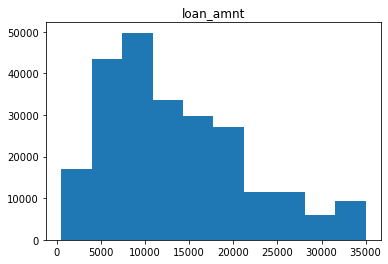

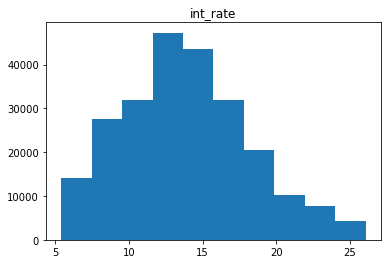

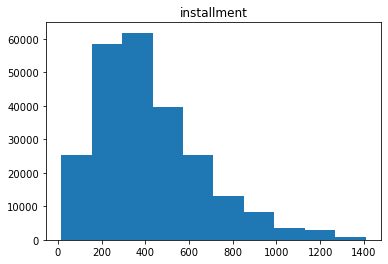

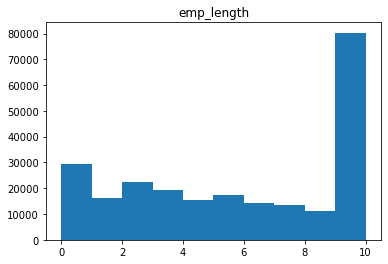

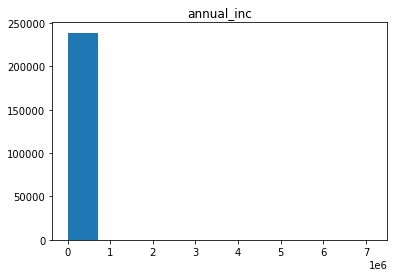

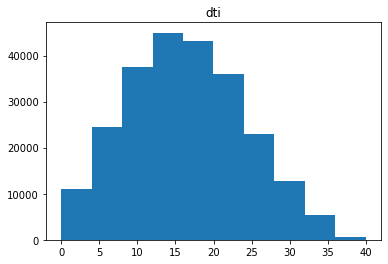

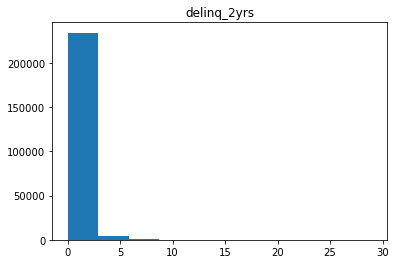

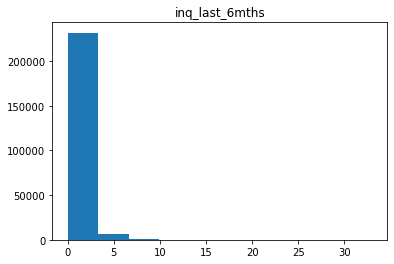

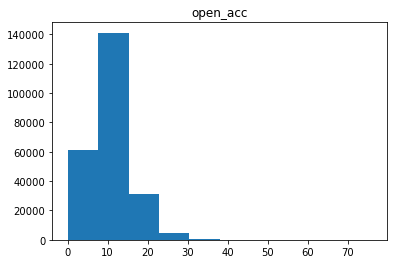

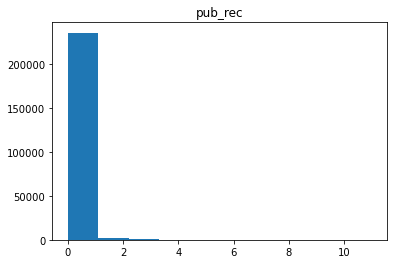

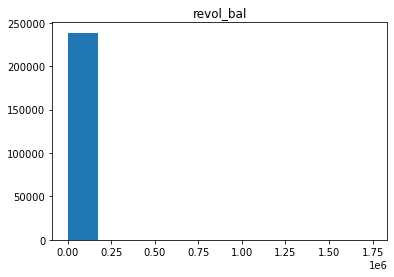

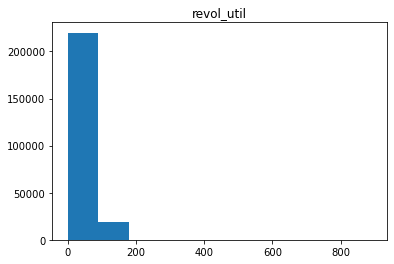

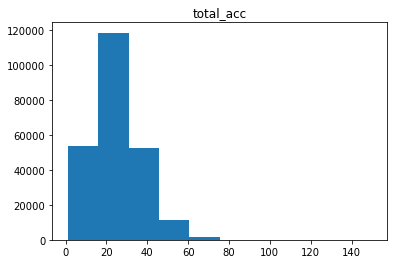

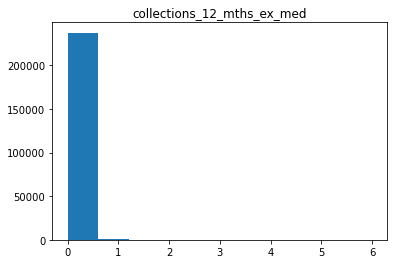

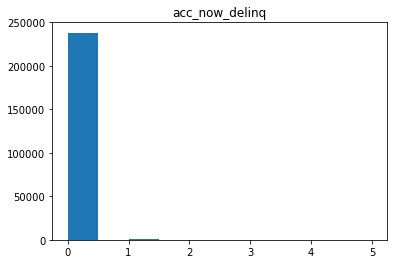

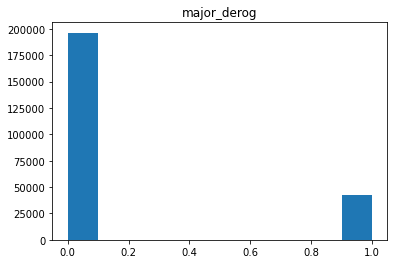

In [52]:
#Histogram
for i in nm_data.columns:
    plt.hist(nm_data[i])
    plt.title(i)
    plt.show()

<AxesSubplot:>

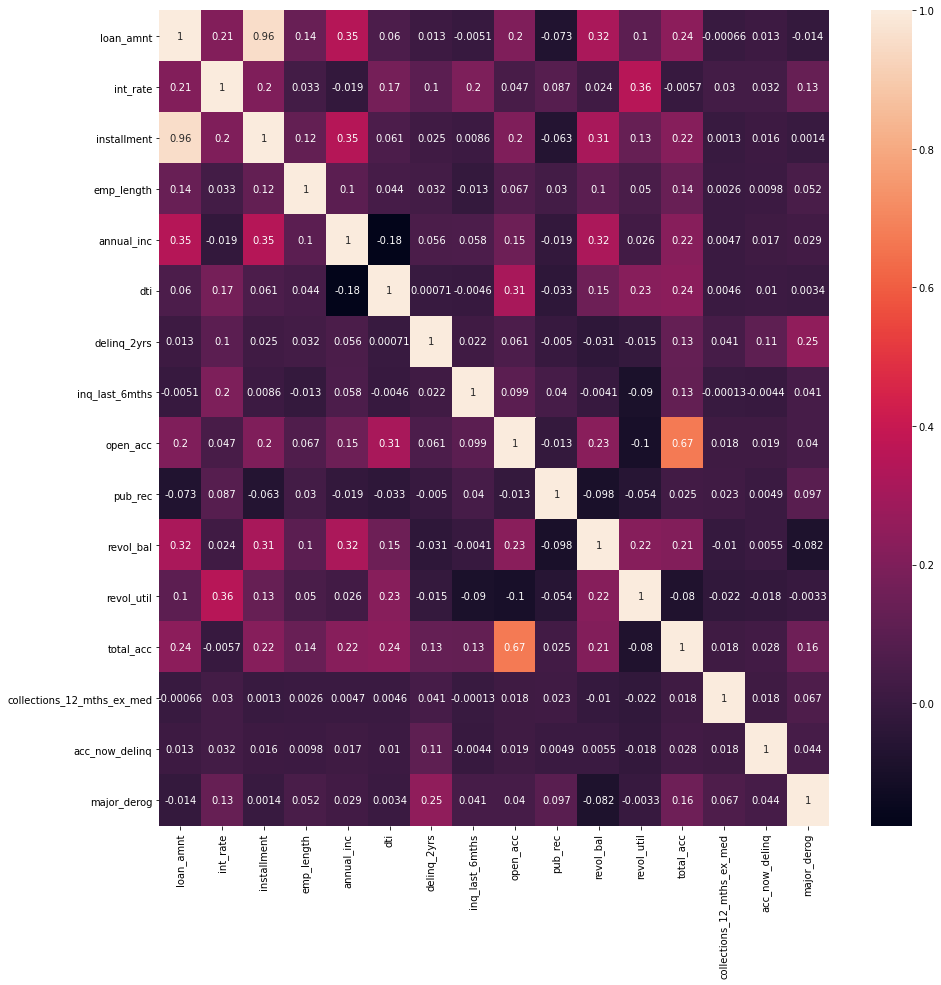

In [56]:
#Heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data=nm_data.corr(), annot=True)

In [57]:
#Pivot
pd.pivot_table(new_data, index = 'loan_ending', values = nm_data.columns)

,acc_now_delinq,annual_inc,collections_12_mths_ex_med,delinq_2yrs,dti,emp_length,inq_last_6mths,installment,int_rate,loan_amnt,major_derog,open_acc,pub_rec,revol_bal,revol_util,total_acc
loan_ending,,,,,,,,,,,,,,,,
good,0.002592,73692.992170,0.005412,0.236330,15.918505,5.584441,0.872566,409.765891,13.263637,13167.962855,0.171721,10.787136,0.131097,15243.436530,53.712532,24.945764
risk,0.003986,65615.836951,0.007822,0.291129,18.304479,5.502932,1.029550,442.587052,15.973031,14624.953053,0.200801,11.113025,0.148650,15150.614552,59.588562,24.333576


Kesimpulan yang didapatkan
1. Ada beberapa outliner dalam data
2. Hanya sedikit data numerical yang mempunyai distribusi normal
3. Terlihat ada hubungan yang hampir sempurna dari 'installment' dan 'loan_amnt'

Dari tabel pivot, ada beberapa chiri khusus untuk pinjaman risk:
1. 'acc_now_delingq' dan 'deling_2yrs' yang tinggi
2. 'annual_inc' yang lebih rendah
3. 'installment' dan '14624.953053' yang lebih tinggi
4. 'major_derog' yang lebih tinggi
dsb

In [58]:
cg_data.nunique()

term                        2
grade                       7
sub_grade                  35
emp_title              129889
home_ownership              6
verification_status         3
purpose                    14
title                   49930
zip_code                  875
addr_state                 50
initial_list_status         2
loan_ending                 2
dtype: int64

Selanjutnya kita akan membuang columns yang mempunyai banyak variabel seperti 'emp_title', 'title', dan 'zip_code' yang kita rasa juga tidak perlu digunakan dalam model prediksi ini.

In [59]:
#membuang columns
dropcol7 = ['zip_code', 'title', 'emp_title']

cg_data.drop(dropcol7, axis=1, inplace=True)

In [60]:
#melihat kembali isi data categorical
cg_data.nunique()

term                    2
grade                   7
sub_grade              35
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64

In [64]:
new_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [65]:
new_data['sub_grade'].unique()

array(['B2', 'C4', 'C5', 'C1', 'A4', 'E1', 'F2', 'B5', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F1', 'E5', 'G4', 'E2', 'G2', 'G1', 'F5', 'F4',
       'G5', 'G3'], dtype=object)

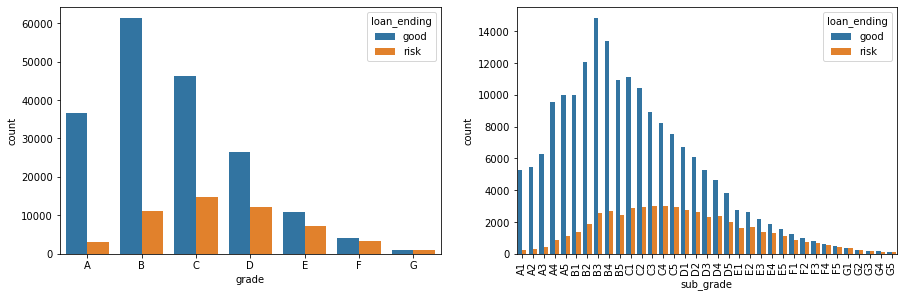

In [67]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(new_data.grade.unique().tolist())
sns.countplot(x='grade', data=new_data, hue='loan_ending', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(new_data.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=new_data, hue='loan_ending', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90);

In [68]:
cg_data.nunique()

term                    2
grade                   7
sub_grade              35
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64

Karena dalam plot grade dan subgrade terlihat sama makan kita bisa membuang salah satu columns, yang kita buang adalah 'sub'grade'. Lalu kita akan mengubah data categorical menjadi numerical untuk mempermudah dalam memasukkan model.

1. untuk 'term' kita akan membuang months untuk menjadikan numerical
2. untuk 'grade' kita akan mengubah menjadi numerik per grade
3. untuk 'home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status' kita akan melakukan seperti 'major_grade' dimana yes adalah '1' dan no adalah '0'

In [72]:
cg_data.drop('sub_grade', axis = 1, inplace=True)

cg_data.nunique()

term                    2
grade                   7
home_ownership          6
verification_status     3
purpose                14
addr_state             50
initial_list_status     2
loan_ending             2
dtype: int64

In [73]:
#1. Mengubah 'term'
cg_data['term'] = cg_data['term'].str.replace(' months', '').astype(int)

In [74]:
#2. Mengubah 'grade'
cg_data['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [75]:
grade_new = {'A' : 1,'B' : 2,'C' : 3,'D' : 4,'E' : 5,'F' : 6,'G' : 7,}

cg_data['grade'] = cg_data['grade'].map(grade_new)

In [76]:
cg_data['grade'].unique()

array([2, 3, 1, 5, 6, 4, 7], dtype=int64)

Membuat dummy pada columns baru

In [78]:
#3. membuat yes (1) dan no (0)
newcols0 = ['home_ownership', 'verification_status', 'purpose', 'addr_state', 'initial_list_status']

dummy = pd.get_dummies(cg_data[newcols0])
dummy.drop('initial_list_status_w', axis=1, inplace=True)

In [79]:
#melihat dummy
dummy.head()

,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_car,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
5,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
#membuang columns yang telah yes (1) dan no (0)
cg_data.drop(newcols0, axis=1, inplace=True)

In [83]:
#menggabungkan data categorical dengan data yes or no
cg_data_final = pd.concat([cg_data, dummy], axis = 1)

Selanjutnya kita menggabungkan data categorical dan numerical

In [85]:
data_final = pd.concat([nm_data, cg_data_final], axis = 1).dropna().reset_index().drop('index', axis = 1)
data_final.head()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
0,5000,10.65,162.87,10,24000.0,27.65,0.0,1.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
1,2500,15.27,59.83,0,30000.0,1.00,0.0,5.0,3.0,0.0,...,0,0,0,0,0,0,0,0,0,1
2,2400,15.96,84.33,10,12252.0,8.72,0.0,2.0,2.0,0.0,...,0,0,0,0,0,0,0,0,0,1
3,10000,13.49,339.31,10,49200.0,20.00,0.0,1.0,10.0,0.0,...,0,0,0,0,0,0,0,0,0,1
4,5000,7.90,156.46,3,36000.0,11.20,0.0,3.0,9.0,0.0,...,0,0,0,0,0,0,0,0,0,1


In [86]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238568 entries, 0 to 238567
Data columns (total 93 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   loan_amnt                            238568 non-null  int64  
 1   int_rate                             238568 non-null  float64
 2   installment                          238568 non-null  float64
 3   emp_length                           238568 non-null  int32  
 4   annual_inc                           238568 non-null  float64
 5   dti                                  238568 non-null  float64
 6   delinq_2yrs                          238568 non-null  float64
 7   inq_last_6mths                       238568 non-null  float64
 8   open_acc                             238568 non-null  float64
 9   pub_rec                              238568 non-null  float64
 10  revol_bal                            238568 non-null  int64  
 11  revol_util   

# Modelling

In [87]:
#menentukan features dan target kita
X = data_final.drop('loan_ending', axis = 1) #data features
y = data_final['loan_ending'] #data target

In [88]:
X.describe()

,loan_amnt,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,...,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY,initial_list_status_f
count,238568.000000,238568.000000,238568.000000,238568.000000,2.385680e+05,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,...,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000,238568.000000
mean,13493.602348,13.855254,417.152673,5.569146,7.192109e+04,16.446962,0.248135,0.906308,10.864630,0.135026,...,0.009377,0.076045,0.008136,0.031597,0.001664,0.023075,0.012034,0.004527,0.002339,0.743645
std,8064.959391,4.380820,243.689410,3.716000,5.506366e+04,7.696235,0.735257,1.171023,4.824763,0.421605,...,0.096379,0.265071,0.089833,0.174925,0.040759,0.150143,0.109039,0.067131,0.048306,0.436621
min,500.000000,5.420000,15.670000,0.000000,1.896000e+03,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7200.000000,10.990000,239.550000,2.000000,4.500000e+04,10.720000,0.000000,0.000000,7.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,12000.000000,13.670000,365.230000,5.000000,6.150000e+04,16.150000,0.000000,1.000000,10.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,18000.000000,16.590000,545.990000,10.000000,8.600000e+04,21.890000,0.000000,1.000000,13.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,35000.000000,26.060000,1408.130000,10.000000,7.141778e+06,39.990000,29.000000,33.000000,76.000000,11.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [91]:
y.value_counts()

good    186464
risk     52104
Name: loan_ending, dtype: int64

In [92]:
from sklearn.model_selection import train_test_split

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [97]:
#Models
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import VotingClassifier

#Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [103]:
#Decision tree
dtree = DecisionTreeClassifier(random_state = 14)
dtree = dtree.fit(train_X, train_y)
pred_y = dtree.predict(val_X)
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

        good       0.81      0.80      0.80     46760
        risk       0.29      0.31      0.30     12882

    accuracy                           0.69     59642
   macro avg       0.55      0.55      0.55     59642
weighted avg       0.70      0.69      0.69     59642



In [104]:
#KNN
knn = KNeighborsClassifier()
knn.fit(train_X, train_y)
pred_y = knn.predict(val_X)
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

        good       0.79      0.92      0.85     46760
        risk       0.28      0.11      0.16     12882

    accuracy                           0.75     59642
   macro avg       0.53      0.52      0.50     59642
weighted avg       0.68      0.75      0.70     59642



In [105]:
#Random Forest
randof = RandomForestClassifier(random_state = 14)
randof.fit(train_X, train_y)
pred_y = randof.predict(val_X)
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

        good       0.80      0.98      0.88     46760
        risk       0.57      0.08      0.14     12882

    accuracy                           0.79     59642
   macro avg       0.68      0.53      0.51     59642
weighted avg       0.75      0.79      0.72     59642



In [107]:
#XGB
xgb = XGBClassifier(random_state = 14)

#mengubah nilai y karena xgboost hanya bisa numerical
only_train_y = np.where(train_y == 'good', 1, 0)
only_val_y = np.where(val_y == 'good', 1, 0)

xgb.fit(train_X, only_train_y)
pred_y = xgb.predict(val_X)
print(classification_report(only_val_y, pred_y))

              precision    recall  f1-score   support

           0       0.53      0.12      0.19     12882
           1       0.80      0.97      0.88     46760

    accuracy                           0.79     59642
   macro avg       0.67      0.54      0.54     59642
weighted avg       0.74      0.79      0.73     59642



In [108]:
#ensemble soft voting classifier
v_clf = VotingClassifier(estimators = [('knn',knn),('randof',randof),('xgb',xgb)], voting = 'soft')
v_clf.fit(train_X, train_y)
pred_y = v_clf.predict(val_X)
print(classification_report(val_y, pred_y))

              precision    recall  f1-score   support

        good       0.79      0.99      0.88     46760
        risk       0.55      0.05      0.10     12882

    accuracy                           0.79     59642
   macro avg       0.67      0.52      0.49     59642
weighted avg       0.74      0.79      0.71     59642



Dari klasifikasi report diatas dapat diambil beberapa poin:

1. Precision = jika presisi >0.5 maka variabel prediksi benar lebih tinggi daripada variabel prediksi salah. Misalkan, presisi 'good' adalah 0.81 maka dari semua pinjaman yang diprediksi 'good' 81% benar pinjaman 'good' dan 19% adalah pinjaman risk
2. Recall = jika recall >0.5 maka berdasarkan dari nilai sebernarnya, kita telah memprediksi lebih dari 50% benar. Misalkan, 'good' recall dari 0.80 adalah kita telah memprediksi pinjaman 'good' 80% benar dan 20% salah

Untuk accuracy tidak dapat menjadi penjamin, karena itu kita harus melihat juga dari precision dan recall.

Sebagai kesimpulan:
1. precision 'good' tinggi berarti kita kurang mendapat pinjaman risk ('good' tinggi = prediksi pinjaman bagus/good loan benar terprediksi)
2. precision 'risk' tinggi berarti kita menghindari pinjaman risk ('risk' tinggi = prediksi pinjaman risk/risk loan benar terprediksi) sehingga model telah mampu memprediksi dan kita dapat menghindari pinjaman risk
3. high 'good' recall berarti kita telah mendapat banyak pinjaman good yang ada (dalam kasus saya nilai recall setinggi mungkin)
4. high 'risk' recall berarti kita telah menghindari pinjaman risk yang ada (dalam kasus saya kalau bisa nilai lebih dari 50%)

Dari beberapa model diatas, dilihat dari syarat di kesimpulan, model terbaik yang bisa dipakai adalah
1. Random Forest: dalam algoritma ini, terdapat 80% pinjaman good dan 20% pinjaman risk, dan kita telah mendapat 98% pinjaman 'good' yang ada. Kita juga telah menghindari 57% pinjaman risk
2. XGB: dalam algoritma ini, terdapat 80% pinjaman good dan 20% pinjaman risk, dan kita telah mendapat 97% pinjaman 'good' yang ada. Kita juga telah menghindari 53% pinjaman risk
3. Soft Voting Classifier: dalam algoritma ini, terdapat 79% pinjaman good dan 21% pinjaman risk, dan kita telah mendapat 99% pinjaman 'good' yang ada. Kita juga telah menghindari 55% pinjaman risk

Karena saya belum terlalu mempelajari mengenai tuning parameter, prediksi model machine learning akan saya selesaikan sampai sini. Selanjutnya jika model ingin lebih baik silahkan mencoba tunning parameter sehingga menghasilkan precision dan recall yang lebih baik.